In [2]:
import mysql.connector as mariadb
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [3]:
spark = SparkSession.builder.appName('Data Analysis and Visualization').getOrCreate()

In [3]:
# Find and plot which transaction type has a high rate of transactions.

sqlQuery = "(SELECT TRANSACTION_TYPE, COUNT(TRANSACTION_ID) AS TRANSACTIONS FROM cdw_sapp_credit_card \
    GROUP BY TRANSACTION_TYPE \
    ORDER BY TRANSACTIONS DESC) as Script"

sp_sqlQuery = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("user", "root") \
  .option("password", "password") \
  .option("dbtable", sqlQuery) \
  .load()

sp_sqlQuery.show()

+----------------+------------+
|TRANSACTION_TYPE|TRANSACTIONS|
+----------------+------------+
|           Bills|        6861|
|      Healthcare|        6723|
|            Test|        6683|
|       Education|        6638|
|   Entertainment|        6635|
|             Gas|        6605|
|         Grocery|        6549|
+----------------+------------+



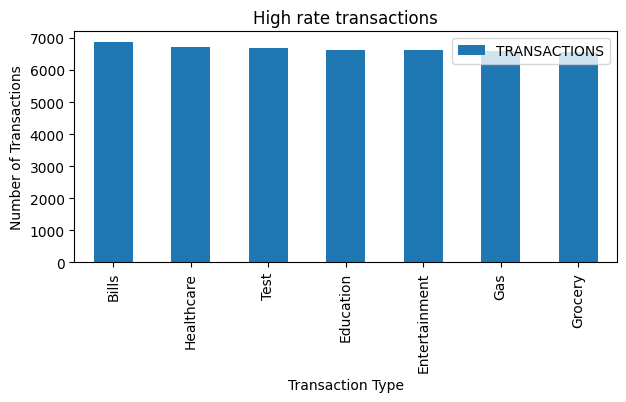

In [7]:
sql_df = sp_sqlQuery.toPandas()
sql_df.plot(kind='bar', x='TRANSACTION_TYPE', y='TRANSACTIONS', figsize=(7,3))
plt.title('High rate transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

In [5]:
# Find and plot which state has a high number of customers.

sqlQuery = "(SELECT CUST_STATE, COUNT(SSN) AS CUST_NUMBER FROM cdw_sapp_customer \
    GROUP BY CUST_STATE \
    ORDER BY CUST_NUMBER DESC) as Script"

sp_sqlQuery = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("user", "root") \
  .option("password", "password") \
  .option("dbtable", sqlQuery) \
  .load()

sp_sqlQuery.show()

+----------+-----------+
|CUST_STATE|CUST_NUMBER|
+----------+-----------+
|        NY|         96|
|        GA|         73|
|        PA|         72|
|        FL|         64|
|        IL|         58|
|        NJ|         53|
|        MD|         50|
|        CA|         45|
|        OH|         44|
|        MI|         44|
|        VA|         39|
|        NC|         37|
|        TX|         33|
|        MA|         33|
|        SC|         30|
|        WI|         29|
|        MN|         28|
|        MS|         24|
|        IA|         21|
|        KY|         17|
+----------+-----------+
only showing top 20 rows



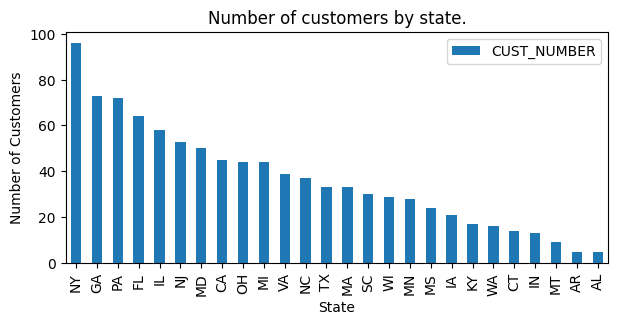

In [6]:
sql_df = sp_sqlQuery.toPandas()
sql_df.plot(kind='bar', x='CUST_STATE', y='CUST_NUMBER', figsize=(7,3))
plt.title('Number of customers by state.')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

In [47]:
# Find and plot the sum of all transactions for the top 10 customers, 
# and which customer has the highest transaction amount. hint(use CUST_SSN).

sqlQuery = "(SELECT tran.CUST_SSN, ROUND(SUM(tran.TRANSACTION_VALUE), 2) TRANS_VALUE \
    FROM cdw_sapp_credit_card tran \
    INNER JOIN cdw_sapp_customer cust \
        ON tran.CUST_SSN = cust.SSN \
    GROUP BY tran.CUST_SSN \
    ORDER BY TRANS_VALUE DESC LIMIT 10) as Script"

sp_sqlQuery = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("user", "root") \
  .option("password", "password") \
  .option("dbtable", sqlQuery) \
  .load()

sp_sqlQuery.show()

+---------+-----------+
| CUST_SSN|TRANS_VALUE|
+---------+-----------+
|123451125|    5633.07|
|123452783|    5548.14|
|123453486|    5476.08|
|123458668|    5314.97|
|123456678|    5261.03|
|123452026|    5241.18|
|123452518|    5223.96|
|123454933|    5203.08|
|123457547|    5149.75|
|123452085|    5133.29|
+---------+-----------+



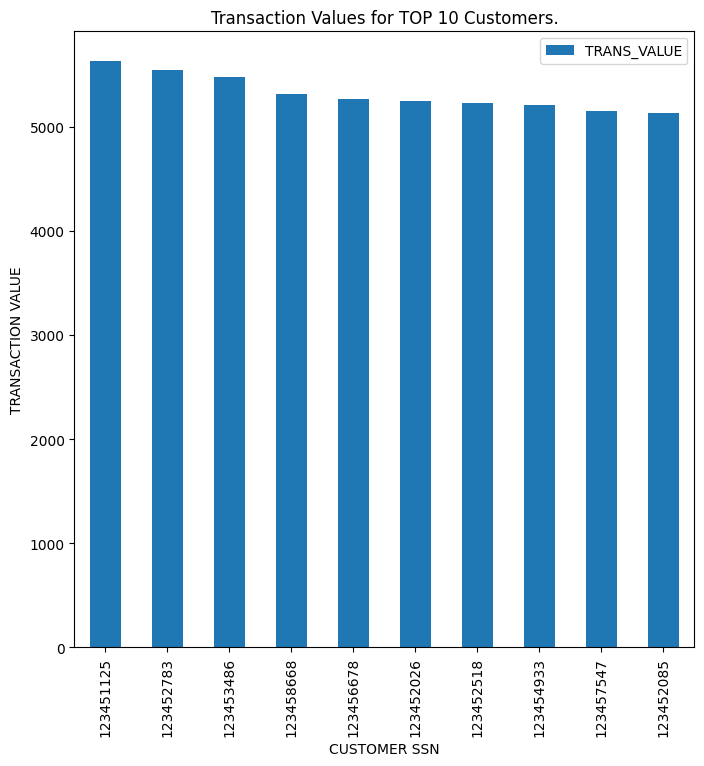

In [51]:
sql_df = sp_sqlQuery.toPandas()
sql_df.plot(kind='bar', x='CUST_SSN', y='TRANS_VALUE', figsize=(8,8))
plt.title('Transaction Values for TOP 10 Customers.')
plt.xlabel('CUSTOMER SSN')
plt.ylabel('TRANSACTION VALUE')
plt.show()